In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Arc, RegularPolygon
import math
import os
import re

from config import folder_names
from config import color_palette

# Loading the data
We are going to loop through all of the files and create on single data frame containing all the loaded data for a given folder

In [5]:
folder_to_be_loaded = folder_names[0] # working on yc

# reading all participant files in one single directory
folder_data_dir = os.path.join(os.getcwd(), "data", folder_to_be_loaded)
output_dir_path = os.path.join(os.getcwd(), "output")
# Check if the output directory exists, if not, create it
if not os.path.exists(output_dir_path):
    os.makedirs(output_dir_path)
    
# Initialize an empty DataFrame to append all data
all_data = pd.DataFrame()

# reading all participant files in one single directory
for file in os.listdir(folder_data_dir):
    # Regular expression to match the file name
    if re.match(r"^\d+\.csv$", file):
        subjid = file.split('.')[0]
        subjid = re.match(r"^\d+", file).group(0)

        print(f"Loading data for subject {subjid}")
        
        # Loading each single data and appending it to a single dataframe
        data_path = os.path.join(folder_data_dir, file)
        data_temp = pd.read_csv(os.path.join(data_path))

        # Add a column for the subject ID
        data_temp['subject_id'] = subjid
        data_temp['subject_label'] = f"{folder_to_be_loaded}"

        all_data = pd.concat([all_data, data_temp], ignore_index=True)  # Append the temporary DataFrame to the main DataFrame

csv_filename = f"{folder_to_be_loaded}_all_data.csv"
# Construct the full path to the CSV file within the output directory
csv_file_path = os.path.join(output_dir_path, csv_filename)
# Save the DataFrame to CSV in the specified path
all_data.to_csv(csv_file_path, index=False)


Loading data for subject 10
Loading data for subject 11
Loading data for subject 12
Loading data for subject 13
Loading data for subject 14
Loading data for subject 15
Loading data for subject 3
Loading data for subject 4
Loading data for subject 5
Loading data for subject 6
Loading data for subject 7
Loading data for subject 8
Loading data for subject 9


# Basic visualization 
Let s visualize the entire dataset

In [13]:
all_data.head()

,sequenceNumber,blockNumber,blockTrialNumber,timeAtStartTrial,timeAtReachedReposition,startingCorner_x,startingCorner_y,startingCorner_z,timeAtStartEncodingDistance,encodingDistance,...,timeAtStartProductionDistance,startingPositionProductionDistance_x,startingPositionProductionDistance_y,startingPositionProductionDistance_z,productionDistance_x,productionDistance_y,productionDistance_z,timeAtEndProductionDistance,subject_id,subject_label
0,1,0,0,1468.742,1478.699,1.5,0.0,1.25,1487.721,3.2,...,1541.784,-0.4764,0.0,-0.9320,2.3936,0.0,-1.7265,1548.200,10,yc
1,2,0,1,1551.707,1561.520,1.5,0.0,-1.25,1570.542,4.5,...,1611.330,-1.6020,0.0,1.2787,1.6755,0.0,-1.9726,1615.061,10,yc
2,3,0,2,1618.568,1629.049,1.5,0.0,1.25,1638.071,2.3,...,1670.103,0.1913,0.0,-0.0224,1.8265,0.0,0.6916,1673.146,10,yc
3,4,0,3,1676.652,1685.507,1.5,0.0,1.25,1694.528,2.3,...,1727.563,-0.0372,0.0,0.2217,0.8989,0.0,2.0312,1729.947,10,yc
4,5,0,4,1733.456,1743.846,-1.5,0.0,1.25,1752.868,3.9,...,1797.130,1.1173,0.0,-1.5731,-2.0555,0.0,-4.3065,1800.282,10,yc


In [16]:
all_data.columns

Index(['sequenceNumber', 'blockNumber', 'blockTrialNumber', 'timeAtStartTrial',
       'timeAtReachedReposition', 'startingCorner_x', 'startingCorner_y',
       'startingCorner_z', 'timeAtStartEncodingDistance', 'encodingDistance',
       'encodingDirection_x', 'encodingDirection_y', 'encodingDirection_z',
       'turningEncodingPosition_x', 'turningEncodingPosition_y',
       'turningEncodingPosition_z', 'timeAtEndEncodingDistance',
       'timeAtStartEncodingAngle', 'isEncodingClockwise', 'encodingAngle',
       'timeAtEndEncodingAngle', 'timeAtStartProductionAngle',
       'isProductionClockwise', 'productionDirection_x',
       'productionDirection_y', 'productionDirection_z',
       'timeAtEndProductionAngle', 'timeAtStartProductionDistance',
       'startingPositionProductionDistance_x',
       'startingPositionProductionDistance_y',
       'startingPositionProductionDistance_z', 'productionDistance_x',
       'productionDistance_y', 'productionDistance_z',
       'timeAtEndProdu

Let s check that all of the participant have done the required amount of trials (i.e. 32)

In [12]:
trials_count = all_data.groupby('subject_id')[['sequenceNumber']].size()
trials_count


subject_id
10    32
11    32
12    32
13    32
14    32
15    32
3     32
4     32
5     32
6     32
7     32
8     32
9     32
dtype: int64

Check the object inside of the columns

In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   sequenceNumber                        416 non-null    int64  
 1   blockNumber                           416 non-null    int64  
 2   blockTrialNumber                      416 non-null    int64  
 3   timeAtStartTrial                      416 non-null    float64
 4   timeAtReachedReposition               416 non-null    float64
 5   startingCorner_x                      416 non-null    float64
 6   startingCorner_y                      416 non-null    float64
 7   startingCorner_z                      416 non-null    float64
 8   timeAtStartEncodingDistance           416 non-null    float64
 9   encodingDistance                      416 non-null    float64
 10  encodingDirection_x                   416 non-null    float64
 11  encodingDirection_y

In [ ]:

# Check if all groups have exactly 32 items
all_have_32_items = trials_count.eq(32).all()

if all_have_32_items:
    print("All subject_id groups have exactly 32 items.")
else:
    print("Not all subject_id groups have exactly 32 items.")

Calculating the trial duration for each participant. Visualizing the distribution of that data.

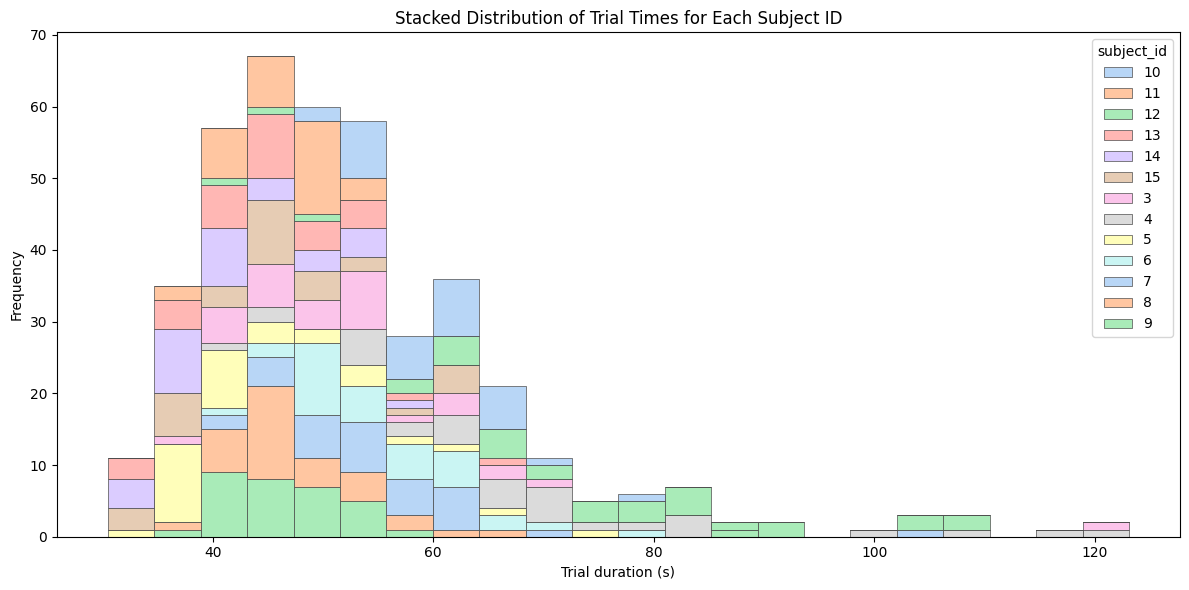

In [15]:
all_data['time_difference'] = all_data['timeAtEndProductionDistance'] - all_data['timeAtStartTrial']
# Plotting the stacked distribution of trial times for each subject_id
plt.figure(figsize=(12, 6))
sns.histplot(data=all_data, x="time_difference", hue="subject_id", multiple="stack", palette="pastel", edgecolor=".3", linewidth=.5)

plt.title("Distribution of trial times for each subject")
plt.xlabel("Trial duration (s)")
plt.ylabel("Frequency")

plt.tight_layout()

In [47]:
def drawCircArrow(ax,radius,centX,centY,angle_,theta2_,orientation_,arrowDirection_,color_,linewidth = 1.2,label=None):
    
    # Create the arc (circle in this case)
    arc = Arc([centX, centY], radius*2, radius*2, angle=angle_, theta1=0, theta2=theta2_, capstyle='round', linestyle='-', lw=linewidth, color=color_)
    ax.add_patch(arc)
    
    # Create triangle as arrow head (not needed for a full circle, but included as per function definition)
    arrowTip_X = centX + (radius * np.cos(math.radians(arrowDirection_)))
    arrowTip_Y = centY + (radius * np.sin(math.radians(arrowDirection_)))

    # Calculate the center of the arrowhead by moving back along the direction of the arrowhead orientation
    arrow_size = radius / 20  # The size of the arrowhead
    arrow_center_offset = arrow_size * 2 / np.sqrt(3)  # Distance from the center of the triangle to the tip
    # Adjust the center position based on the orientation
    arrowHead_X = arrowTip_X - arrow_center_offset * np.cos(orientation_)
    arrowHead_Y = arrowTip_Y - arrow_center_offset * np.sin(orientation_)

    arrowHead = RegularPolygon((arrowHead_X, arrowHead_Y), numVertices=3, radius=arrow_size, orientation=orientation_, color=color_, linewidth=linewidth, label=label)
    ax.add_patch(arrowHead)

def visualise_ccq_trial(d,trial_num):
    
    #plotting variables
    head_width = 0.1
    line_width= 2
    starting_marker_size = 12
    crystal_marker_size_spawn = 15
    crystal_marker_size_reposition = 15
    starting_position_color = color_palette[4]
    arrow_encoding_distance_color = color_palette[4]
    fog_position_color = color_palette[0]
    encoding_angle_color = color_palette[1]
    production_angle_color = color_palette[2]
    circular_arrow_width = 3.0
    text_font_size = 16
    text_font_ticks = 13
    text_font_size_title = 19


    plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')  # Ensures circles are not distorted

    # a: plot starting corner
    plt.plot(d['startingCorner_x'],d['startingCorner_z'],marker="o",markersize=starting_marker_size, color=arrow_encoding_distance_color)    
    
    # b: plot walking path
    dx = (d['turningEncodingPosition_x'] - d['startingCorner_x'])
    dz = (d['turningEncodingPosition_z'] - d['startingCorner_z'])
    plt.arrow(d['startingCorner_x'], d['startingCorner_z'], dx, dz, head_width = head_width,lw=line_width,color=arrow_encoding_distance_color,length_includes_head=True, label="Encoding Distance")
    
    # b: plot standing position in the fog
    plt.plot(d['turningEncodingPosition_x'],d['turningEncodingPosition_z'],marker="o",markersize=starting_marker_size, color=fog_position_color)
   
    # d: plot the walking path extending beyond standing point
    start_x = d['turningEncodingPosition_x']
    start_z = d['turningEncodingPosition_z']
    end_x = start_x + d['encodingDirection_x']
    end_z = start_z + d['encodingDirection_z']
    plt.plot([start_x, end_x], [start_z, end_z], lw=line_width, linestyle='--', color=arrow_encoding_distance_color)
    
    # e: plot where crystal is found
    encodingAngle = d['encodingAngle']
    print(type(d['isEncodingClockwise']))
    if d['isEncodingClockwise'] == False:
        encodingAngle = -encodingAngle 
    originalAngle = math.atan2(d['turningEncodingPosition_z'] - d['startingCorner_z'], d['turningEncodingPosition_x'] - d['startingCorner_x'])
    crystalDirection = originalAngle-math.radians(encodingAngle)
    crystalOrigin_x = d['turningEncodingPosition_x'] + math.cos(crystalDirection)
    crystalOrigin_z = d['turningEncodingPosition_z'] + math.sin(crystalDirection)
    
    # i: plot encoding angle
    theta2_ = d['encodingAngle']
    if d['isEncodingClockwise'] == True:
        angle_ = math.degrees(originalAngle) - d['encodingAngle']
        orientation_ = math.radians(angle_-180)
        arrowDirection_ = angle_
    else:
        angle_ = math.degrees(originalAngle)
        orientation_ = math.radians(angle_+theta2_)
        arrowDirection_ = theta2_+angle_
    drawCircArrow(ax,0.5,d['turningEncodingPosition_x'],d['turningEncodingPosition_z'],angle_,theta2_,orientation_,arrowDirection_,color_=encoding_angle_color, linewidth=circular_arrow_width, label="Encoding Angle")
    
    # j: plot production angle    
    productionDirection = math.degrees(math.atan2(d['productionDirection_z'],d['productionDirection_x']))
    if d['isProductionClockwise'] is False:
        angle_ = productionDirection
        theta2_ = math.degrees(crystalDirection) - productionDirection
        orientation_ = math.radians(angle_-180)
        arrowDirection_ = angle_ 
    else:
        angle_ = math.degrees(crystalDirection)
        theta2_ = productionDirection - angle_
        orientation_ = math.radians(angle_+theta2_)
        arrowDirection_ = theta2_+angle_         
    drawCircArrow(ax,1.0,d['turningEncodingPosition_x'],d['turningEncodingPosition_z'],angle_,theta2_,orientation_,arrowDirection_,color_=production_angle_color, linewidth=circular_arrow_width, label="Production Angle")
    
    plt.plot(crystalOrigin_x,crystalOrigin_z,marker="d",markersize=crystal_marker_size_spawn,color=encoding_angle_color,alpha=1.0)

    # f: plot the direction facing where the crystal is found
    plt.plot([d['turningEncodingPosition_x'], crystalOrigin_x], [d['turningEncodingPosition_z'], crystalOrigin_z], linestyle=':', lw=line_width, color=encoding_angle_color)

    # g: plot homing direction
    start_x = d['turningEncodingPosition_x']
    start_z = d['turningEncodingPosition_z']
    end_x = start_x + d['productionDirection_x']
    end_z = start_z + d['productionDirection_z']
    plt.plot([d['turningEncodingPosition_x'], d['productionDistance_x']], [d['turningEncodingPosition_z'], d['productionDistance_z']], lw=line_width, linestyle='--', color=production_angle_color, label="Production Distance")
    #plt.arrow(d['turningEncodingPosition_x'], d['turningEncodingPosition_z'], d['productionDirection_x'], d['productionDirection_z'],head_width = head_width,lw=line_width,color=production_angle_color, length_includes_head=True)

    # h: plot where cystal is placed
    plt.plot(d['productionDistance_x'],d['productionDistance_z'],marker="d",markersize=crystal_marker_size_reposition,color=production_angle_color)
         
    # Set the limits for x-axis and y-axis
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('X Position', fontsize=text_font_size)
    plt.ylabel('Z Position', fontsize=text_font_size)
    plt.xticks(fontsize=text_font_ticks)
    plt.yticks(fontsize=text_font_ticks)
    plt.axis('equal')

    plt.legend(loc='best', fontsize=text_font_ticks)

    plt.title(f'Trial {trial_num}', fontsize=text_font_size_title)
    
    return theta2_

In [45]:
#Extracting the first row
first_row = all_data.iloc[1]
first_row


sequenceNumber                                 2
blockNumber                                    0
blockTrialNumber                               1
timeAtStartTrial                        1551.707
timeAtReachedReposition                  1561.52
startingCorner_x                             1.5
startingCorner_y                             0.0
startingCorner_z                           -1.25
timeAtStartEncodingDistance             1570.542
encodingDistance                             4.5
encodingDirection_x                      -0.7682
encodingDirection_y                          0.0
encodingDirection_z                       0.6402
turningEncodingPosition_x                 -1.957
turningEncodingPosition_y                    0.0
turningEncodingPosition_z                 1.6308
timeAtEndEncodingDistance               1581.969
timeAtStartEncodingAngle                1583.986
isEncodingClockwise                        False
encodingAngle                              300.0
timeAtEndEncodingAng

<class 'numpy.bool_'>


-484.96787425048655

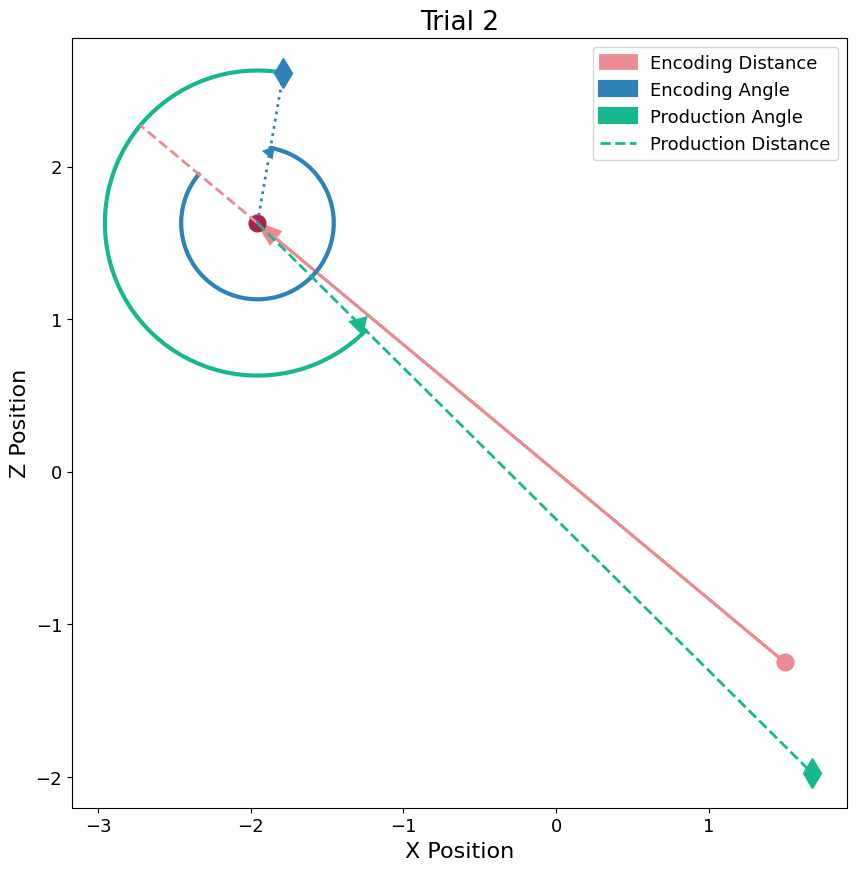

In [48]:
visualise_ccq_trial(first_row,first_row['sequenceNumber'])